In [9]:
import pandas as pd
import numpy as np
import pyspark as spark
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime

auth = r"D:\DocumentsSte\VSCode\Proj1Streamlit\resources\car_prices.csv"

df = pd.read_csv(auth)

df = df.dropna()
df = df.drop_duplicates()

df["year"].min()

np.int64(1990)

- Best selling brand  -> **Best_Brand**

In [ ]:
##Best_Brand

df_make_value = df.groupby(["make"])[['sellingprice']].agg(['mean','sum','std'])

df_make_volume = df.groupby(["make"])[['vin']].agg(['count'])

top_brand_value = df_make_value['sellingprice']['sum'].idxmax()
top_sales_value = df_make_value['sellingprice']['sum'].max()

top_brand_volume = df_make_volume['vin']['count'].idxmax()
top_sales_volume = df_make_volume['vin']['count'].max()

print(f"Highest selling brand: {top_brand_value} with total sales: ${top_sales_value:,.2f} and total sold vehicles: {top_sales_volume:,.2f}")



- Best selling model in the brand  -> **Best_Model**

In [ ]:
df_make_value = df.groupby(["make","model"])[['sellingprice']].agg(['mean','sum','std'])

df_make_volume = df.groupby(["make","model"])[['vin']].agg(['count'])

top_brand_value = df_make_value['sellingprice']['sum'].idxmax()[0] + " " + df_make_value['sellingprice']['sum'].idxmax()[1]
top_sales_value = df_make_value['sellingprice']['sum'].max()

top_brand_volume = df_make_volume['vin']['count'].idxmax()[0] + " " + df_make_volume['vin']['count'].idxmax()[1]
top_sales_volume = df_make_volume['vin']['count'].max()

print(f"Highest selling brand/model: {top_brand_value} with total sales: ${top_sales_value:,.2f}")

print(f"Highest selling brand/model: {top_brand_volume} with total sold vehicles: {top_sales_volume:,.2f}")

- best selling brand in body type  -> **Best_Brand_Body_Type**

In [17]:
# group by body and make and get the sum of sellingprice
df_body_make_value = df.groupby(["body","make"])[['sellingprice']].agg(['sum'])

# get the id of the max selling price for each body type
# apply(lambda x: x[1]) gets a element of a list or tuple in case of x[0] is the first element of the tuple
max_sales_per_body1 = df_body_make_value['sellingprice']['sum'].groupby("body").idxmax().apply(lambda x: x[1])

# get the max selling price for each body type
max_sales_per_body2 = df_body_make_value['sellingprice']['sum'].groupby("body").max()

max_sales_per_body = pd.merge(max_sales_per_body1, max_sales_per_body2, left_index=True, right_index=True)

#change name of columns
max_sales_per_body.rename(columns={'sum_x': 'Make','sum_y': 'Total_SellingPrice'}, inplace=True)

max_sales_per_body.nlargest(15, 'Total_SellingPrice')

# plot Columns chart

,Make,Total_SellingPrice
body,,
SUV,Ford,355568130.0
Sedan,Nissan,246359645.0
SuperCrew,Ford,138929006.0
G Sedan,Infiniti,113343754.0
Crew Cab,Chevrolet,87351816.0
Minivan,Dodge,63608361.0
suv,Ford,59840457.0
sedan,Nissan,49818587.0
SuperCab,Ford,46585841.0


- best selling model in body type  -> **Best_Model_Body_Type**

In [18]:
# group by body, make and model and get the sum of sellingprice
df_body_model_value = df.groupby(["body","make","model"])[['sellingprice']].agg(['sum'])

# get the id of the max selling price for each body type
# apply(lambda x: x[1]) gets a element of a list or tuple in case of x[0] is the first element of the tuple
max_sales_body_model1 = df_body_model_value['sellingprice']['sum'].groupby("body").idxmax().apply(lambda x: x[1]+' / '+x[2])

# get the max selling price for each body type
max_sales_body_model2 = df_body_model_value['sellingprice']['sum'].groupby("body").max()

max_sales_body_model = pd.merge(max_sales_body_model1, max_sales_body_model2, left_index=True, right_index=True)

#change name of columns
max_sales_body_model.rename(columns={'sum_x': 'Model','sum_y': 'Total_SellingPrice'}, inplace=True)

max_sales_body_model

# plot Columns chart

,Model,Total_SellingPrice
body,,
Access Cab,Toyota / Tacoma,2222200.0
Beetle Convertible,Volkswagen / Beetle Convertible,828500.0
CTS Coupe,Cadillac / CTS Coupe,2303350.0
CTS Wagon,Cadillac / CTS Wagon,184850.0
CTS-V Coupe,Cadillac / CTS-V Coupe,752371.0
...,...,...
transit van,Ford / Transit Van,158950.0
tsx sport wagon,Acura / TSX Sport Wagon,106650.0
van,GMC / Savana Cargo,2301200.0


In [ ]:
make_filtered = {'Volvo','BMW'}

# Filter DataFrame if at least one category is selected
if make_filtered:
    filtered_df = df[df['make'].isin(make_filtered)]
else:
    filtered_df = df  # Show all data if no selection

filtered_df

- Best seller  -> **Best_Seller**

In [ ]:
# group by body and make and get the sum of sellingprice
df_seller_value = df.groupby(["seller"])[['sellingprice']].agg(['sum'])

df_seller_value1 = df.groupby("seller")[["sellingprice"]].sum().sort_values(by="sellingprice", ascending=False)

df_seller_value1
# plot the bar graph

- selling trend of the best model over the years  -> **Best_Model_Trend**

In [ ]:
df_best_selling_model_value = df.groupby(["body","make","model","year"])[["year","sellingprice"]].agg(['mean',"sum"])
# Flatten the MultiIndex columns
df_best_selling_model_value.columns = ['_'.join(col).strip() for col in df_best_selling_model_value.columns]

df_best_selling_model_value1 = df.groupby(["body","make","model"])[["sellingprice"]].sum()

#.rename(columns={'sellingprice_x': 'Total Sales Model','sellingprice_y': 'Year Sales Model'}, inplace=True)
#.sort_values(by=["Total Sales Model"],ascending=False)


df_best_selling_model = df_best_selling_model_value.merge(df_best_selling_model_value1, on=["body","make","model"])

df_best_selling_model = df_best_selling_model.drop(['year_sum', 'sellingprice_mean',], axis=1)

df_best_selling_model.rename(columns={'year_mean': 'Year','sellingprice': 'Total Sales Model','sellingprice_sum': 'Year Sales Model'}, inplace=True)

df_best_selling_model.sort_values(by=["Total Sales Model","Year"],ascending=[False ,False])

df_best_selling_model



- average price of the model selected and distribution of the prices - with average of mmr -> **Average_Price_Distribution**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2014-01'),
  Text(1, 0, '2014-02'),
  Text(2, 0, '2014-12'),
  Text(3, 0, '2015-01'),
  Text(4, 0, '2015-02'),
  Text(5, 0, '2015-03'),
  Text(6, 0, '2015-04'),
  Text(7, 0, '2015-05'),
  Text(8, 0, '2015-06'),
  Text(9, 0, '2015-07')])

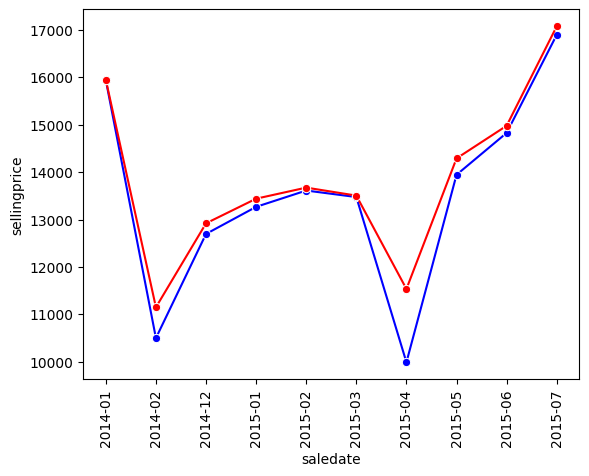

In [23]:
df1 = df.copy()

# print(df['saledate'].head())  # Check raw values before conversion
# print(df.dtypes)  # Check current data types
df1['saledate'] = df1['saledate'].astype('datetime64[ns, UTC]').dt.strftime("%Y-%m")

# calculates the average of the "Selling Price" and "mmr" columns for each unique value in the "saledate" column
df1 = df1.groupby('saledate').agg({'sellingprice': 'mean', 'mmr': 'mean'}).reset_index()

df1 = df1.sort_values(by=["saledate"],ascending=[True])

df_average_price_distribution = df1

fig7, ax = plt.subplots()
sns.lineplot(data=df_average_price_distribution, x="saledate", y="sellingprice", marker="o", color="b", ax=ax)
sns.lineplot(data=df_average_price_distribution, x="saledate", y="mmr", marker="o", color="r", ax=ax)
plt.xticks(rotation=90) # Rotate x-axis labels vertically
# st.pyplot(fig7)





- distribution of prices by brand and by category -> **Price_Distribution_Brand_Category**

In [ ]:
df2 = df

# calculates the average of the "Selling Price" and "mmr" columns for each unique value in the "saledate" column
df2 = df2.groupby(['make','body',]).agg({'sellingprice': 'mean'}).reset_index()

df2 = df2.nlargest(25, 'sellingprice')

# Create a Seaborn scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x=df2['body'], y=df2['sellingprice'], hue=df2['make'], palette="coolwarm", ax=ax)
ax.set_title("Seaborn Scatter Plot")

# # Display in Streamlit
# st.pyplot(fig)


- seasonal prices for each model -> **Seasonal_Prices**

<Axes: xlabel='Year_month', ylabel='sellingprice'>

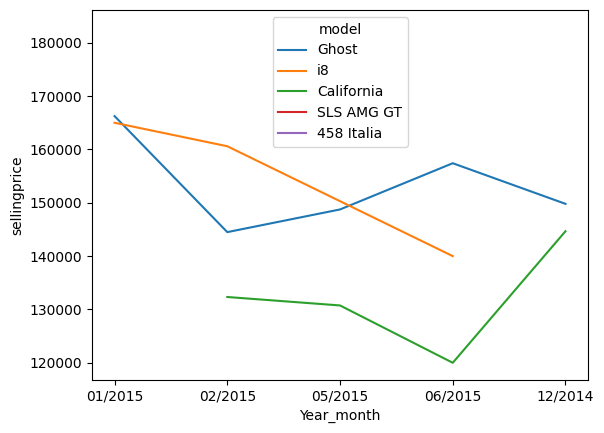

In [ ]:
df3 = df

# Extract only the date part (YYYY-MM-DD)
df3['Year_month'] = df3['saledate'].astype('datetime64[ns, UTC]').dt.strftime("%Y-%m")

df3.sort_values(by=["saledate"],ascending=[True])

df3 = df3.dropna(subset=['saledate'])


df3 = df3.groupby(['Year_month',"model"]).agg({'sellingprice': 'mean'}).reset_index()

df3_top5 = df3.nlargest(10, 'sellingprice')

df3 = df3[df3["model"].isin(df3_top5["model"])]

df3.sort_values(by=["Year_month"],ascending=[True])

# create a seaborn line plot

fig2, ax = plt.subplots()

sns.lineplot(x="Year_month", y="sellingprice", hue="model" ,data=df3)



- seasonal number of sales per make -> **Seasonal_Sales**

<Axes: xlabel='Year_month', ylabel='vin'>

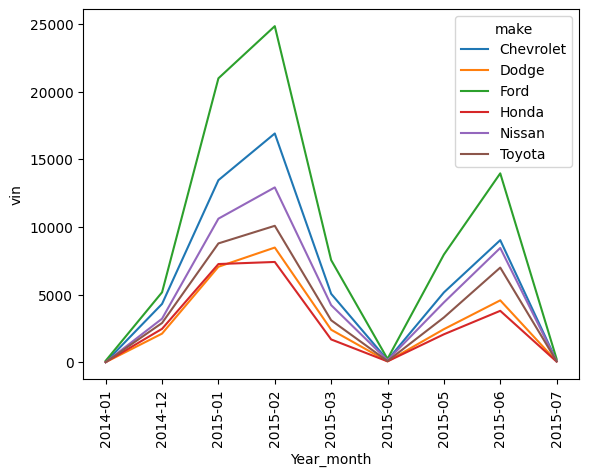

In [7]:
df4 = df

# Extract only the date part (YYYY-MM-DD)
df4['Year_month'] = df4['saledate'].astype('datetime64[ns, UTC]').dt.strftime("%Y-%m")

df4.sort_values(by=["saledate"],ascending=[True])

df4 = df4.dropna(subset=['saledate'])


df4 = df4.groupby(['Year_month',"make"]).agg({'vin': 'count'}).reset_index()

df4_top = df4.nlargest(15, 'vin')

df4 = df4[df4["make"].isin(df4_top["make"])]

df4.sort_values(by=["Year_month"],ascending=[True])

# create a seaborn line plot

fig2, ax = plt.subplots()
plt.xticks(rotation=90) # Rotate x-axis labels vertically
sns.lineplot(x="Year_month", y="vin", hue="make" ,data=df4)



- correlation of odometer and price -> **odometer_price_correlation**

C:\Users\steph\AppData\Local\Temp\ipykernel_38800\3719527675.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df5['odometer'], y=df5['sellingprice'], palette="coolwarm", ax=ax)


NameError: name 'intercept' is not defined

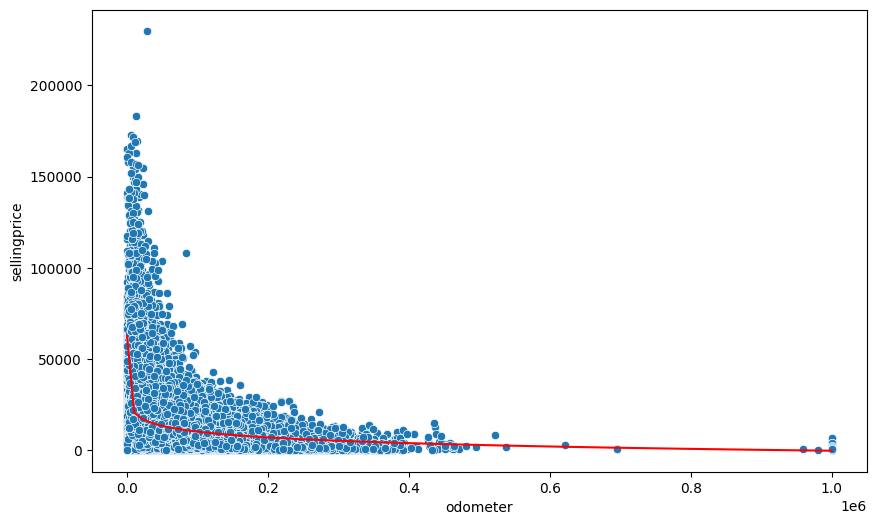

In [ ]:
df5 = df

df5 = df5.dropna(subset=['odometer', 'sellingprice'])

# Drop NaN values and ensure positive odometer values (log is undefined for non-positive values)
df5 = df5.dropna(subset=['odometer', 'sellingprice'])
df5 = df5[df5['odometer'] > 0]  # Ensure positive values for log transformation

# Apply logarithm transformation to odometer
df5['log_odometer'] = np.log(df5['odometer'])

# Perform linear regression: sellingprice = a + b * log(odometer)
b, a, r_value, p_value, std_err = stats.linregress(df5['log_odometer'], df5['sellingprice'])

# Define the logarithmic function
def log_func(x):
    return a + b * np.log(x)

# Generate trendline values
x_vals = np.linspace(df5['odometer'].min(), df5['odometer'].max(), 100)
y_vals = log_func(x_vals)

# --------------------------------------

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df5['odometer'], y=df5['sellingprice'], palette="coolwarm", ax=ax)

# Plot logarithmic trend curve
plt.plot(x_vals, y_vals, color='red', label='Logarithmic Trendline')

# Display the logarithmic equation
equation_text = f"y = {b:.2f} + {a:.2f} * ln(x)"
plt.text(0.05, 0.95, equation_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Labels and legend
ax.set_title("Odometer vs Selling Price with Logarithmic Trendline")
ax.set_xlabel("Odometer (km)")
ax.set_ylabel("Selling Price ($)")
plt.legend()
plt.show()

# Print equation details
print(f"Equation of the logarithmic curve: y = {intercept:.2f} + {slope:.2f} * ln(x)")
print(f"R-squared value: {r_value**2:.4f}")  # Goodness of fit measure


- correlation of color and price -> **color_price_correlation**

In [ ]:
df6 = df

df6 = df6.dropna(subset=["sellingprice"])

q1 = df6["sellingprice"].quantile(0.25)
q3 = df6["sellingprice"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df6 = df6[(df6["sellingprice"] >= lower_bound) & (df6["sellingprice"] <= upper_bound)]

# Calculate median selling price for each color and sort in descending order
median_order6 = df6.groupby("color")["sellingprice"].median().sort_values(ascending=False).index

# Create a Seaborn Box Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df6["color"], y=df6["sellingprice"], order=median_order6, data=df6)  # Box plot
ax.set_title("Boxplot of Selling Price by Color")
ax.set_xlabel("Color")
ax.set_ylabel("Selling Price ($)")
plt.xticks(rotation=90) # Rotate x-axis labels vertically
plt.legend()
plt.show()


# # Display in Streamlit
# st.pyplot(fig)


- correlation of transmission and price - compare means -> **transmission_price_correlation**

In [ ]:
df7 = df

df7 = df7.dropna(subset=["sellingprice"])

q1 = df7["sellingprice"].quantile(0.25)
q3 = df7["sellingprice"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df7 = df7[(df7["sellingprice"] >= lower_bound) & (df7["sellingprice"] <= upper_bound)]

median_order7 = df7.groupby("transmission")["sellingprice"].median().sort_values(ascending=False).index

# Create a Seaborn Box Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df7["transmission"], y=df7["sellingprice"],order=median_order7, data=df7)  # Box plot
ax.set_title("Boxplot of Selling Price by Transmission")
ax.set_xlabel("Transmission")
ax.set_ylabel("Selling Price ($)")
plt.xticks(rotation=90) # Rotate x-axis labels vertically
plt.legend()
plt.show()


# # Display in Streamlit
# st.pyplot(fig)


- correlation of condition and price -> **condition_price_correlation**

In [ ]:
df8 = df

# Drop NaN values and ensure positive odometer values (log is undefined for non-positive values)
df8 = df8.dropna(subset=['condition', 'sellingprice'])
df8 = df8[df8['condition'] > 0]  # Ensure positive values for log transformation

# Perform linear regression: sellingprice = a + b * condition
b, a, r_value, p_value, std_err = stats.linregress(df8['condition'], df8['sellingprice'])

# Define the logarithmic function
def func(x):
    return a + b * x

# Generate trendline values
df8_x_vals = np.linspace(df8['condition'].min(), df8['condition'].max(), 100)
df8_y_vals = func(df8_x_vals)

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df8['condition'], y=df8['sellingprice'], palette="coolwarm", ax=ax)

# Plot logarithmic trend curve
plt.plot(df8_x_vals, df8_y_vals, color='red', label='Trendline')

# Display the logarithmic equation
equation_text = f"y = {b:.2f} + {a:.2f} * x"
plt.text(0.05, 0.95, equation_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Labels and legend
ax.set_title("Condition vs Selling Price with Logarithmic Trendline")
ax.set_xlabel("Condition")
ax.set_ylabel("Selling Price ($)")
plt.legend()
plt.show()

# Print equation details
print(f"Equation of the logarithmic curve: y = {b:.2f} + {a:.2f} * x")
print(f"R-squared value: {r_value**2:.4f}")  # Goodness of fit measure

